# Pretrained CLIP Model

https://huggingface.co/docs/transformers/model_doc/clip

CLIP is a multi-modal vision and language model. It can be used for image-text similarity and for zero-shot image classification. CLIP uses a ViT like transformer to get visual features and a causal language model to get the text features. Both the text and visual features are then projected to a latent space with identical dimension. The dot product between the projected image and text features is then used as a similar score.

In [14]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel

In [15]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

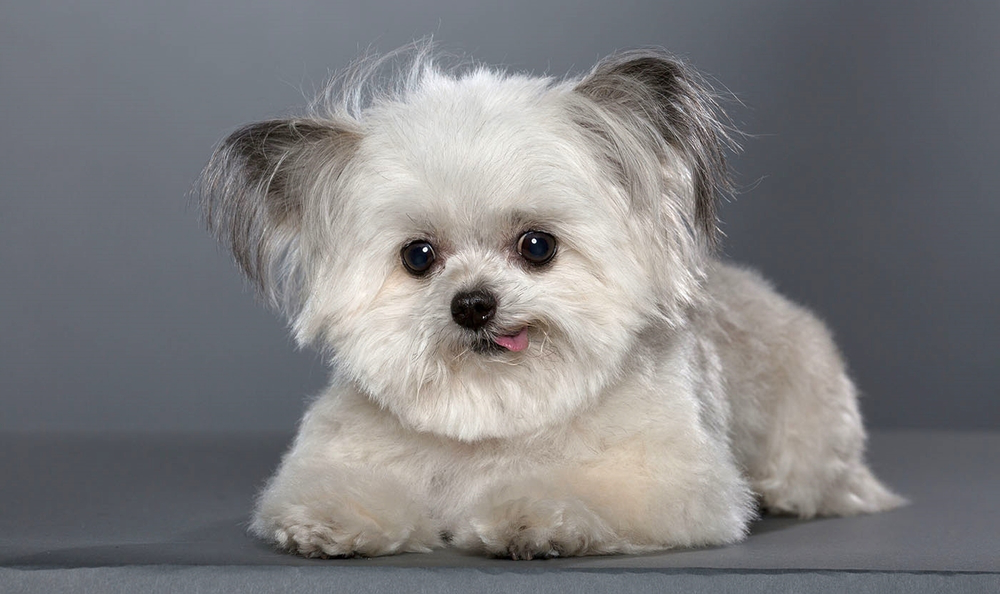

In [17]:
path = "images/dog.jpg"
image = Image.open(path)
display(image)

In [18]:
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities#

In [20]:
logits_per_image

tensor([[21.5300, 27.3433]], grad_fn=<TBackward0>)

In [21]:
probs

tensor([[0.0030, 0.9970]], grad_fn=<SoftmaxBackward0>)